#  Coding Assignment #3 - Fraud Detection Models

In [1]:
# Bring in dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

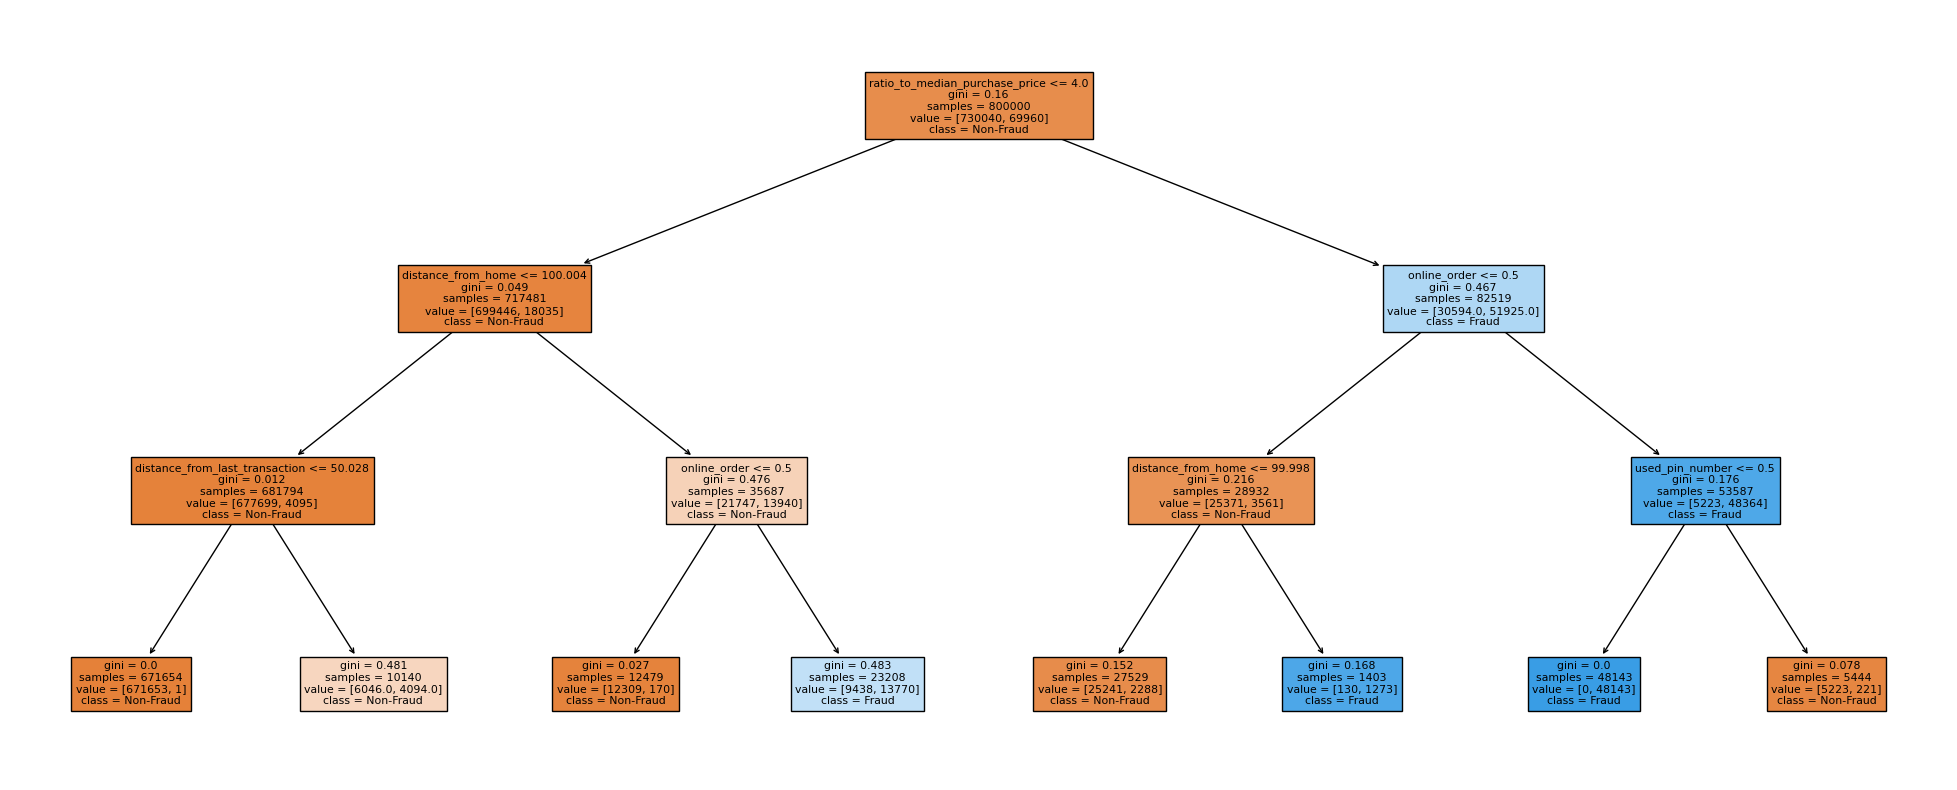

In [3]:
# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model_dtc = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model_dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dtc = model_dtc.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)
classification_rep_dtc = classification_report(y_test, y_pred_dtc)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_dtc:.2f}")
print("Confusion Matrix:")
print(confusion_dtc)
print("Classification Report:")
print(classification_rep_dtc)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model_dtc, 
          filled=True, 
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


---
# Student work below

 ## Data Analysis: 
 - Deepen your understanding of the dataset by performing additional exploratory data analysis.

In [7]:
# Describe data with native pandas
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


**Note:** well behaving dataset with continiuos and descrete values, target='fraud'.

In [9]:
# Check missing data
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**Note:** no missing values detected, no obvious need to impude.

In [10]:
# Check predictor names
list(X.columns.values) 

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

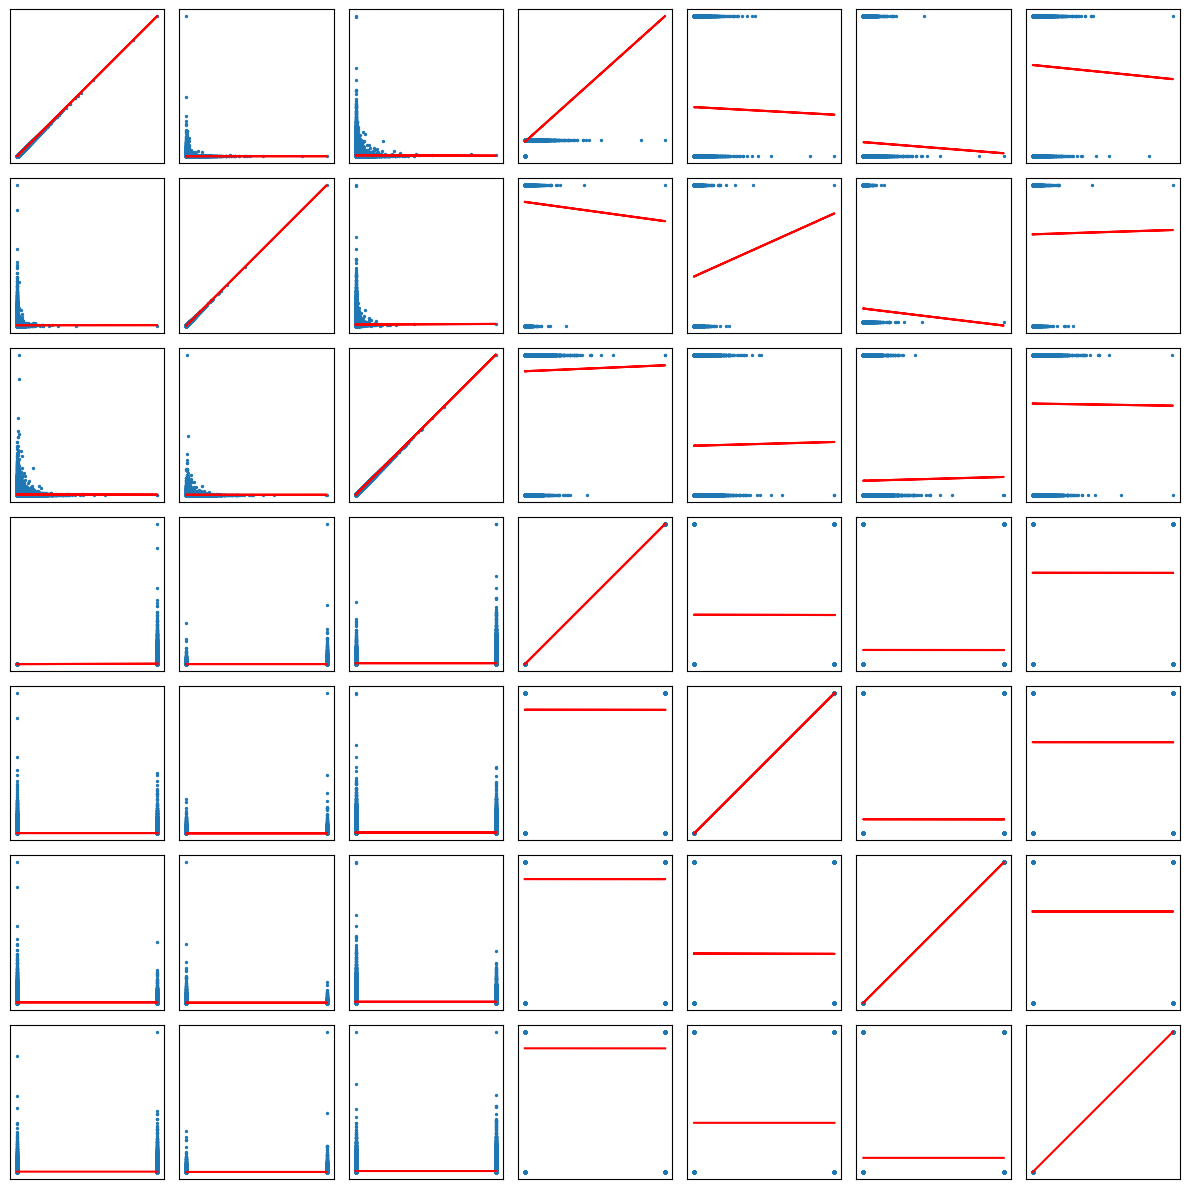

In [11]:
# Check pairwise relations
X = data.drop(columns=['fraud']) # Get all predictrors
predictors = list(X.columns.values) # Grab their names

fig, axes = plt.subplots(figsize=(12, 12), nrows=len(predictors), ncols=len(predictors))
for i, x in enumerate(predictors):
   for j, y in enumerate(predictors):
       ax = axes[i, j]
       ax.scatter(data[x], data[y], s=2)
       z = np.polyfit(data[x], data[y], 1)
       p = np.poly1d(z)
       ax.plot(data[x], p(data[x]), color='r')
       ax.set_xticks([])
       ax.set_yticks([])

plt.tight_layout()
plt.show()

**Note:** some non-linearity is expected, possible influential outliers.

In [12]:
# Check data types and scales, no need to change anything for a tree-based models
continuous_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
categorcial_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

In [13]:
# Native way to detect outliers using IQR
Q1 = data[continuous_cols].quantile(0.25)
Q3 = data[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[continuous_cols]< (Q1 - 1.5 * IQR)) | (data[continuous_cols] > (Q3 + 1.5 * IQR)))
# Show only columns with outliers
outliers_summary = outliers.any()
columns_with_outliers = outliers_summary[outliers_summary].index.tolist()

print("Columns with outliers:")
print(columns_with_outliers)

Columns with outliers:
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


In [14]:
# Check where outliers could be, i.e rows with outliers in at least one column
data[continuous_cols][outliers.any(axis=1)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
5,5.586408,13.261073,0.064768
12,765.282559,0.371562,0.551245
13,2.131956,56.372401,6.358667
15,179.665148,0.120920,0.535640
16,114.519789,0.707003,0.516990
...,...,...,...
999973,10.148074,4.465290,12.022734
999977,3.184748,46.842801,0.303374
999979,19.530964,26.010599,0.533640
999985,31.343592,11.599512,1.367658


**Note:** generally outliers shouldn't be a big problem for an entropy reducing tree-based model, unless they are systematic in some way or concentrated in a specific region.

## Model Building and Evaluation: 
- Beyond the decision tree, experiment with another model such as Random Forest to compare performance.


In [4]:
# Initialize a decision tree classifier
model_rfc = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model_rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = model_rfc.predict(X_test)

# Evaluate the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
confusion_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

# Print the results
print("\n--- Random Forest Model Performance Metrics ---")
print(f"Accuracy: {accuracy_rfc:.2f}")
print("Random Forest Confusion Matrix:")
print(confusion_rfc)
print("Random Forest Classification Report:")
print(classification_rep_rfc)



--- Random Forest Model Performance Metrics ---
Accuracy: 0.97
Random Forest Confusion Matrix:
[[182557      0]
 [  5294  12149]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    182557
         1.0       1.00      0.70      0.82     17443

    accuracy                           0.97    200000
   macro avg       0.99      0.85      0.90    200000
weighted avg       0.97      0.97      0.97    200000



**Note:** Random Forest performance is similar to the original Decision Tree model what is expected due to a similar entropy reducing approach and maximum deapth limited to 3 levels. Overall accuracy is down to 0.97 compared to 0.98, as bagging approach with the same random seed doesn't allow to find a better structure. The 'fraud' class 1 recall goes down to 0.7 from the original 0.91. In practical terms this means that out of total 17,443 instances of 'fraud', only 12,149 are properly classified as 'fraud' compared to 15,797 before. This is also supported by declining macro average accuracy and weighted average accuracy, as well as declining F1-scores. 

## Performance Metrics: 
- Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.

In [5]:
# Print Decision Tree results again
print("\n--- Decision Tree Model Performance Metrics ---")
print(f"Accuracy: {accuracy_dtc:.2f}")
print("Decision Tree Confusion Matrix:")
print(confusion_dtc)
print("Decision Tree Classification Report:")
print(classification_rep_dtc)


--- Decision Tree Model Performance Metrics ---
Accuracy: 0.98
Decision Tree Confusion Matrix:
[[180076   2481]
 [  1646  15797]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



**Note**: when comparing to Decision Tree classification report, class 0 recall and class 1 precision were originally a little lowers, but in the context of imbalanced binary classification task of fraud detection, this is actually a good thing. Random Forest, at least in its default hyperparameters configuration, shows somewhat inferior discriminative power. It only achieves a perfect recall of 1 for an 'easy' class 0 and a perfect precision for a 'hard' class 1 at cost of misclassifying true 'defualts'. 

**Conclusion:** at least in theory, Random Forest should produce the same results as Decision Tree given the same dataset. It seems that current inferior performance is due to random variations produced by bagging itself, what can be corrected by changing hyperparameters of the model. 

# End of student work
---

# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.

---
# Student work below

## Extra Credit requirements analysis:
- Implementing the additional requirements in a rigorous and useful way is not a trivial task. One needs to be mindful that comparing Decision Tree and Random Forest models, when allowing for re-sampling, cross-validation and feature importance analysis at the same time, requires accounting for internal dependencies of all three choices.
    - First, correcting imbalanced classes with various sampling techniques will produce new correlations and a different event rate in every new training set.
    - Second, cross-validation needs to create a new train/test split for every fold what requires consistent re-sampling when fitting both models.
    - Third, only game theoretic feature importance produced from the fitted models, will be directly comparable, what also requires tracking testing set associated with a specific training job. This is also additionally complicated by the fact that there will be no single testing set in case of multi-fold cross-validation.


## Proposed approach:
- Given the nature of bagging tree-based optimization, Random Forest should be able to find a better function that a single tree on a given dataset. The optimal set of parameter will differ if the training dataset is alter by over- or under-sampling though. Moreover, feature importances will also change what will prevent direct model comparison. It is therefore proposed:
    - Perform cross-validation with parameters grid search for a Random Forest on the original traiin/test split to find teh best separating function,
    - Compare Decision Tree to the best Random Forest in terms of their discriminatory ability and feature importances,
    - Experiment with various sampling techniques to improve imbalances and compare Decision Tree results to the best Random Forest
    - Compare feature importances of the best resultant models controling for the data sampling strategy

In [31]:
# Bring in additional dependencies
import shap
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours, NearMiss
from imblearn.combine import SMOTEENN
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score


## Grid search for the best Random Forest

In [7]:
# Search for a better Random Forest model using grid search, parameter grid defined below:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest Classifier
model_rfc = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_rfc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_rfc = grid_search.best_estimator_

# Make predictions on the test data
y_pred_rfc = best_rfc.predict(X_test)

# Evaluate the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
confusion_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

# Print the results
print("\n--- Random Forest Model Performance Metrics ---")
print(f"Accuracy: {accuracy_rfc:.2f}")
print("Random Forest Confusion Matrix:")
print(confusion_rfc)
print("Random Forest Classification Report:")
print(classification_rep_rfc)

# Print the best parameters
print("\nBest Parameters:")
print(grid_search.best_params_)

# Return the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Random Forest Model Performance Metrics ---
Accuracy: 1.00
Random Forest Confusion Matrix:
[[182557      0]
 [     3  17440]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Best Parameters:
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=3, min_samples_leaf=2

**Note:** as expected, after timely grid search Random Forest finds a better solution with near perfect performance metrics as shown above. It still misses 3 highly unusual instances of fraud as shown below.

In [9]:
# Zoom into the instances that are still misclassified
y_pred = best_rfc.predict(X_test)

# Create a boolean mask for misclassified instances
misclassified_mask = y_test != y_pred

# Extract misclassified instances
X_misclassified = X_test[misclassified_mask]
y_true_misclassified = y_test[misclassified_mask]
y_pred_misclassified = y_pred[misclassified_mask]

# Create a DataFrame with misclassified instances
misclassified_df = pd.DataFrame(X_misclassified, columns=X_test.columns)
misclassified_df['true_label'] = y_true_misclassified
misclassified_df['predicted_label'] = y_pred_misclassified

# Add index from original test set
misclassified_df.index = X_test.index[misclassified_mask]

# Print summary statistics
print("\nSummary:")
print(f"Total instances: {len(X_test)}")
print(f"Misclassified instances: {len(X_misclassified)}")
print(f"Accuracy: {accuracy_rfc:.2f}")

Misclassified instances:

Summary:
Total instances: 200000
Misclassified instances: 3
Accuracy: 1.00


In [10]:
misclassified_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,true_label,predicted_label
943140,14.515270,50.554625,14.430739,1.0,0.0,1.0,1.0,1.0,0.0
94736,134.755717,54.108171,7.751060,1.0,1.0,1.0,1.0,1.0,0.0
208895,3.367241,51.404196,11.535363,1.0,0.0,1.0,1.0,1.0,0.0


**Note:** best parameters shown below will allow to fit a Random Forest model that outperforms original Decision Tree without correcting for imbalances. 

In [11]:
best_params

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Logic to compare two models

In [173]:
# Method to compare performance of 2 specific models
def compare_tree_models(dt_model, rf_model, X_test, y_test, sampling_strategy='default', experiments_results_df=None, 
                        show_plots=True, max_display=10):
    # Create a new DataFrame if not provided
    if experiments_results_df is None:
        experiments_results_df = pd.DataFrame(columns=['Sampling Strategy', 'Model', 
                                                       'Accuracy', 'Precision', 'Recall', 
                                                       'F1', 'AUC', 'PR AUC',
                                                       'True Positive', 'False Positive', 
                                                       'True Negative', 'False Negative',
                                                       'Top 5 Features'])

    models = [dt_model, rf_model]
    model_names = ['Decision Tree', 'Random Forest']

    if show_plots:
        fig, axs = plt.subplots(3, 2, figsize=(15, 12))
        fig.suptitle('Model Comparison: Decision Tree vs Random Forest', fontsize=12)

    for i, (model, name) in enumerate(zip(models, model_names)):
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        if show_plots:
            sns.heatmap(cm, annot=True, fmt='d', ax=axs[0, i], cmap='Blues')
            axs[0, i].set_title(f'{name} Confusion Matrix')
            axs[0, i].set_xlabel('Predicted')
            axs[0, i].set_ylabel('Actual')

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        if show_plots:
            axs[1, i].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
            axs[1, i].plot([0, 1], [0, 1], 'k--')

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        if show_plots:
            axs[1, i].plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})', linestyle='--')
            axs[1, i].set_xlabel('Recall')
            axs[1, i].set_ylabel('True Positive Rate / Precision')
            axs[1, i].set_title(f'{name} ROC & PR Curves')
            axs[1, i].legend(loc="lower right")

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision_score_value = precision_score(y_test, y_pred)
        recall_score_value = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Get feature importances
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        else:
            importances = np.abs(model.coef_[0])
        feature_importance = pd.DataFrame({'feature': X_test.columns, 'importance': importances})
        top_5_features = feature_importance.sort_values('importance', ascending=False).head(5)['feature'].tolist()

        # Plot feature importance
        if show_plots:
            feature_importance = feature_importance.sort_values('importance', ascending=False).head(max_display)
            sns.barplot(x='importance', y='feature', data=feature_importance, ax=axs[2, i])
            axs[2, i].set_title(f'{name} Feature Importances')
            axs[2, i].set_xlabel('Importance')
            axs[2, i].set_ylabel('Feature')

        # Update results DataFrame
        new_row = pd.DataFrame({
            'Sampling Strategy': [sampling_strategy],
            'Model': [name],
            'Accuracy': [accuracy],
            'Precision': [precision_score_value],
            'Recall': [recall_score_value],
            'F1': [f1],
            'AUC': [roc_auc],
            'PR AUC': [pr_auc],
            'True Positive': [tp],
            'False Positive': [fp],
            'True Negative': [tn],
            'False Negative': [fn],
            'Top 5 Features': [top_5_features]
        })
        experiments_results_df = pd.concat([experiments_results_df, new_row], ignore_index=True)

    if show_plots:
        plt.tight_layout()
        plt.show()

    return experiments_results_df


## Compare original Decision Tree and optimized Random Forest

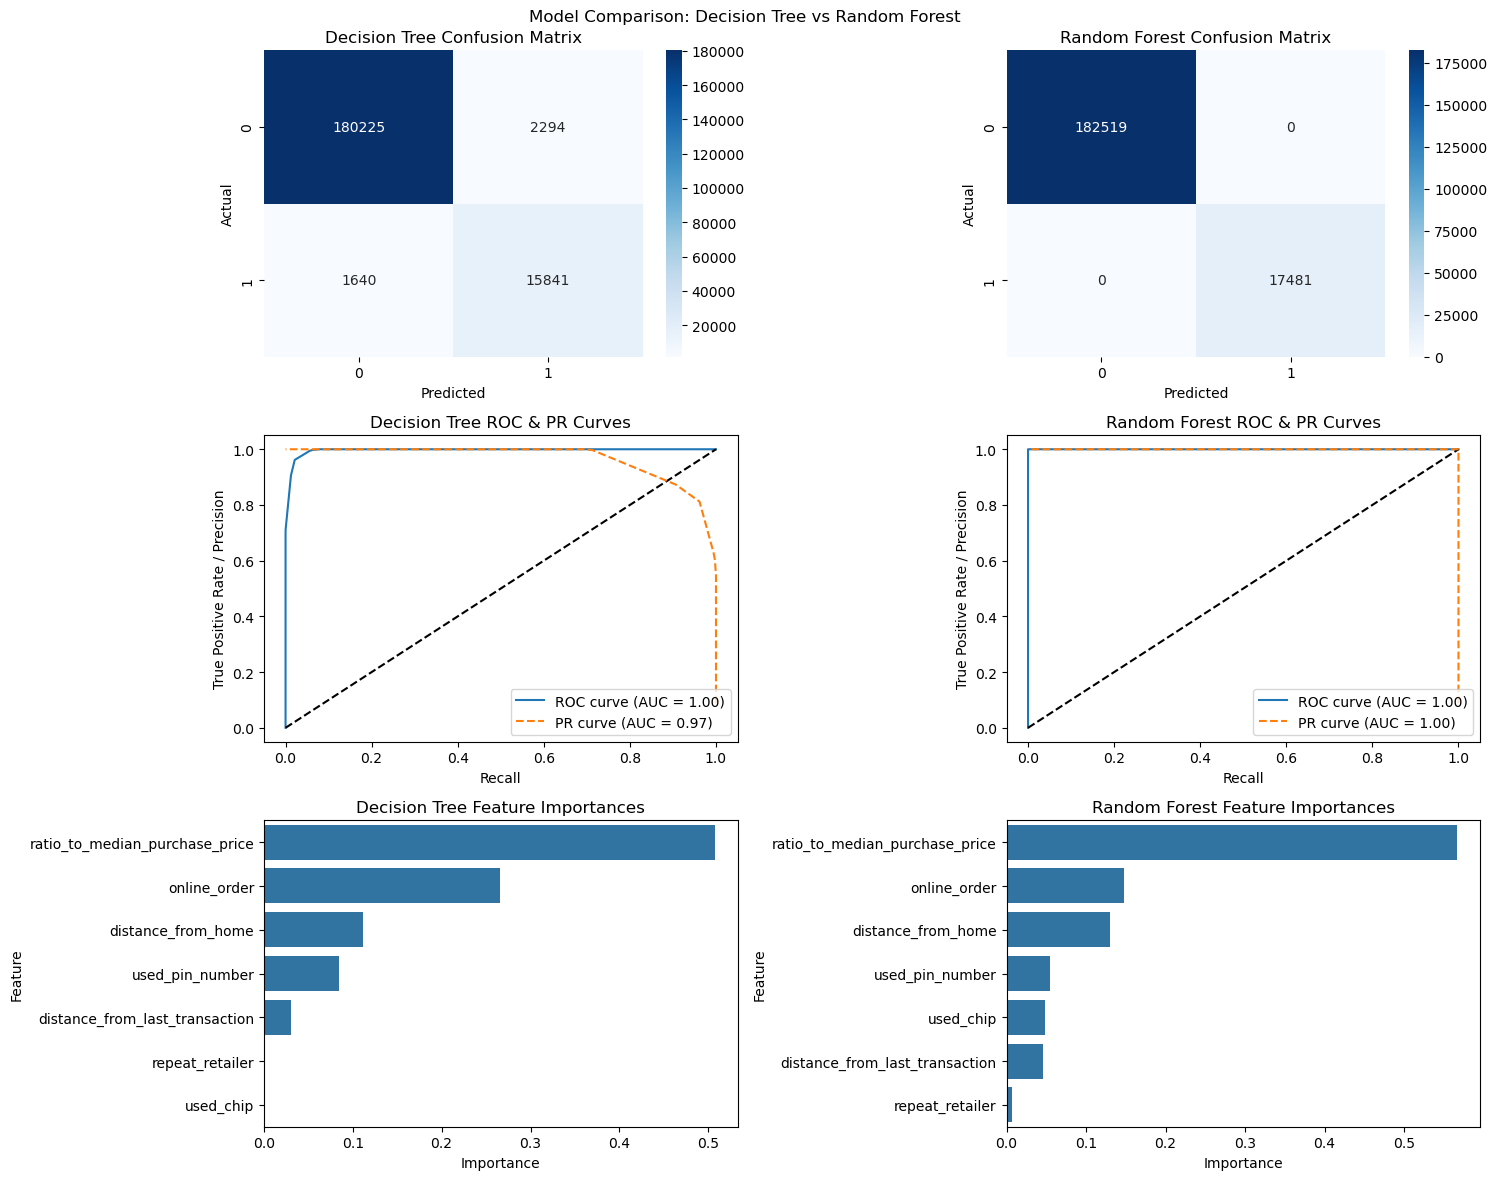

In [201]:
results = compare_tree_models(model_dtc, best_rfc, X_test, y_test)

**Note:** optimized Random Forest has a much better AUC in ROC and PR context; it also puts a little more importance on 'used_chip' feature rather than as 'distance_from_last_transaction".

In [203]:
results

,Sampling Strategy,Model,Accuracy,Precision,Recall,F1,AUC,PR AUC,True Positive,False Positive,True Negative,False Negative,Top 5 Features
0,default,Decision Tree,0.98033,0.873504,0.906184,0.889544,0.996193,0.967336,15841,2294,180225,1640,"[ratio_to_median_purchase_price, online_order, distance_from_home, used_pin_number, distance_from_last_transaction]"
1,default,Random Forest,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,17481,0,182519,0,"[ratio_to_median_purchase_price, online_order, distance_from_home, used_pin_number, used_chip]"


## Logic to check if correcting imbalanced classes can help Decision Tree

In [176]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def sample_data(data, target, test_size=0.2, sampling_strategy='default', show_plots=True):
    """
    Split dataset into train and test sets with optional sampling strategies, 
    and visualize class imbalances, correlations, and VIF if requested.

    Parameters:
        data (pd.DataFrame): Tabular dataset.
        target (str): Name of the target column.
        test_size (float): Proportion of data to use for testing.
        sampling_strategy (str): Sampling strategy ('default', 'SMOTE', 'ENN', 'SMOTEENN', 'NearMiss').
        show_plots (bool): If True, show plots of class distribution, correlations, and VIF.

    Returns:
        X_train (pd.DataFrame): Training features.
        X_test (pd.DataFrame): Testing features.
        y_train (pd.Series): Training target.
        y_test (pd.Series): Testing target.
    """
    # Separate features and target
    X = data.drop(columns=[target])
    y = data[target]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    
    # Save original class distributions
    original_train_counts = Counter(y_train)
    original_test_counts = Counter(y_test)
    original_total_counts = Counter(y)

    # Apply sampling strategy
    sampler = None
    sampling_title = "No Sampling"
    
    if sampling_strategy == 'SMOTE':
        sampler = SMOTE(random_state=42)
        sampling_title = "SMOTE Oversampling"
    elif sampling_strategy == 'ENN':
        sampler = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=50)
        sampling_title = "ENN Undersampling"
    elif sampling_strategy == 'NearMiss':
        sampler = NearMiss(version=3)
        sampling_title = "NearMiss Undersampling"
    elif sampling_strategy == 'SMOTEENN':
        sampler = SMOTEENN(random_state=42)
        sampling_title = "SMOTEENN Combination"
    
    if sampler:
        X_train, y_train = sampler.fit_resample(X_train, y_train)
    
    # Visualize plots if requested
    if show_plots:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # Plot 1: Class Distribution
        train_counts = Counter(y_train)
        test_counts = Counter(y_test)

        # Prepare data for plotting
        categories = [0, 1]  # Always include Class 0 and Class 1
        original_total = sum(original_total_counts.values())
        sampled_train_total = sum(train_counts.values())
        test_total = sum(test_counts.values())

        # Plot original data distributions (grey)
        axes[0].bar(
            [f"Original - Class {cat}" for cat in categories],
            [original_total_counts.get(cat, 0) for cat in categories],
            color='grey',
            label="Original (Total)"
        )

        # Plot sampled train data distributions (green)
        axes[0].bar(
            [f"Train - Class {cat}" for cat in categories],
            [train_counts.get(cat, 0) for cat in categories],
            color='green',
            alpha=0.7,
            label="Train (Sampled)"
        )

        # Plot test data distributions (red)
        axes[0].bar(
            [f"Test - Class {cat}" for cat in categories],
            [test_counts.get(cat, 0) for cat in categories],
            color='red',
            alpha=0.7,
            label="Test"
        )

        # Add percentages to bars
        for cat in categories:
            # Percentages for original data
            orig_height = original_total_counts.get(cat, 0)
            orig_percentage = (orig_height / original_total) * 100 if original_total > 0 else 0
            axes[0].text(f"Original - Class {cat}", orig_height + 1, f"{orig_percentage:.1f}%", ha='center')

            # Percentages for train data
            train_height = train_counts.get(cat, 0)
            train_percentage = (train_height / sampled_train_total) * 100 if sampled_train_total > 0 else 0
            axes[0].text(f"Train - Class {cat}", train_height + 1, f"{train_percentage:.1f}%", ha='center')

            # Percentages for test data
            test_height = test_counts.get(cat, 0)
            test_percentage = (test_height / test_total) * 100 if test_total > 0 else 0
            axes[0].text(f"Test - Class {cat}", test_height + 1, f"{test_percentage:.1f}%", ha='center')

        # Chart formatting
        axes[0].set_title("Class Distribution with Percentages")
        axes[0].set_ylabel("Frequency")
        axes[0].legend()
        axes[0].tick_params(axis='x', rotation=90)
        
        # Plot 2: Correlation Heatmap
        corr = X_train.corr()
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
        axes[1].set_title("Feature Correlations")
        
        # Plot 3: Variance Inflation Factor (VIF)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X_train.columns
        vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
        
        # Bar plot of VIF values
        axes[2].bar(vif_data["Feature"], vif_data["VIF"], color='skyblue')
        axes[2].axhline(y=5, color='red', linestyle='--', label='VIF Threshold (5)')
        axes[2].set_title("Variance Inflation Factor (VIF)")
        axes[2].set_ylabel("VIF Score")
        axes[2].legend()
        axes[2].tick_params(axis='x', rotation=90)
        
        plt.tight_layout()
        plt.show()

    return X_train, X_test, y_train, y_test



In [198]:
best_params

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [200]:
# Function to re-train models on the new datasets
def test_models(data, target, sampling_strategy='default', show_plots=False, experiments_results_df=None):
    """
    Test models with specified sampling strategy and compare their performance.

    Parameters:
        data (pd.DataFrame): The dataset containing features and the target.
        target (str): The target column name.
        sampling_strategy (str): The sampling strategy ('default', 'SMOTE', etc.).
        show_plots (bool): Whether to show plots for `compare_tree_models`.
        experiments_results_df (pd.DataFrame): The DataFrame to store experiment results.

    Returns:
        experiments_results_df (pd.DataFrame): Updated DataFrame with new experiment results.
    """
    # Call sample_data to split and sample the dataset
    X_train, X_test, y_train, y_test = sample_data(
        data, target, sampling_strategy=sampling_strategy, show_plots=False
    )

    # Train the Decision Tree model
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt_model.fit(X_train, y_train)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(max_depth=7, min_samples_leaf=1,min_samples_split=2, random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Compare the models and update the results DataFrame
    experiments_results_df = compare_tree_models(
        dt_model=dt_model,
        rf_model=rf_model,
        X_test=X_test,
        y_test=y_test,
        sampling_strategy=sampling_strategy,
        experiments_results_df=experiments_results_df,
        show_plots=show_plots
    )

    return experiments_results_df


## Testing different sampling against the default benchmark

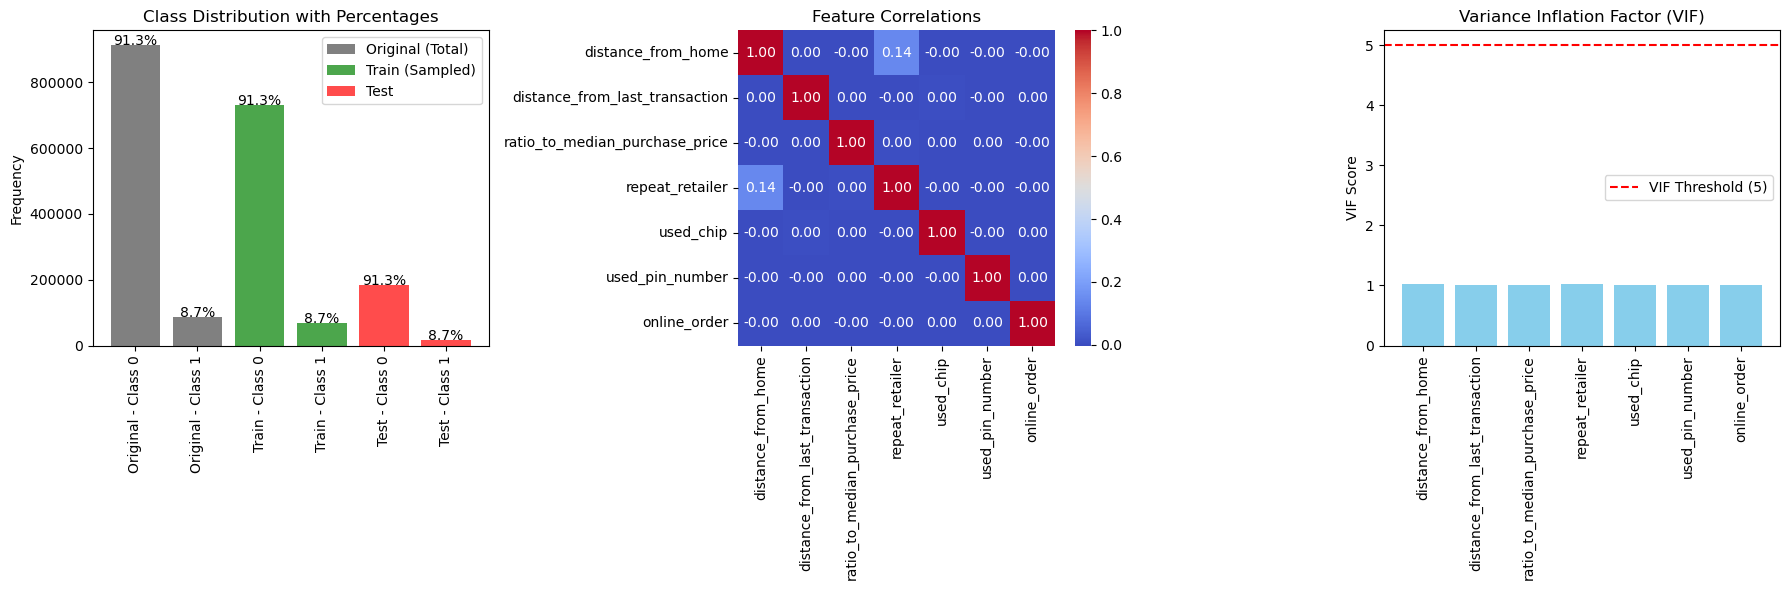

In [190]:
# Base case
X_train, X_test, y_train, y_test = sample_data(data, 'fraud', sampling_strategy='default')

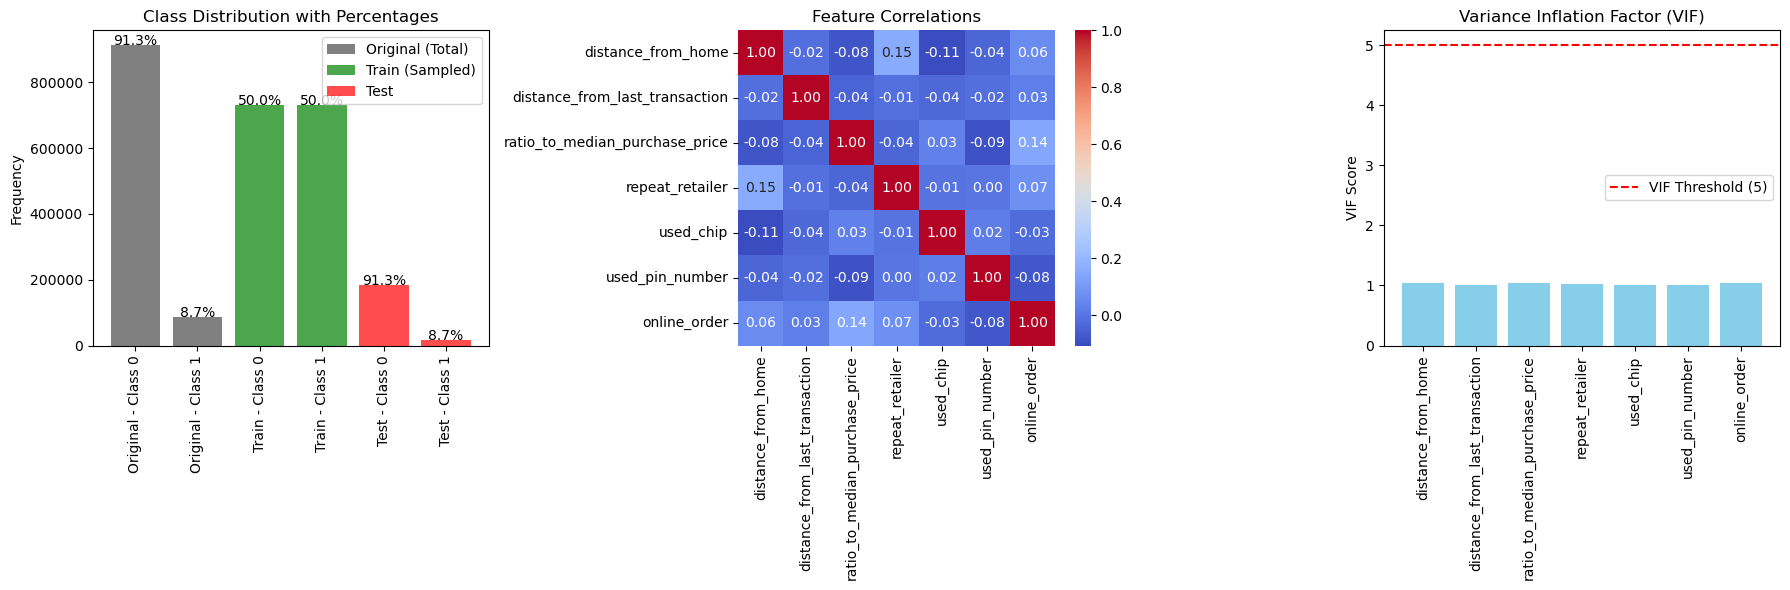

In [191]:
# Synthetically oversampling the minority
X_train, X_test, y_train, y_test = sample_data(data, 'fraud', sampling_strategy='SMOTE')

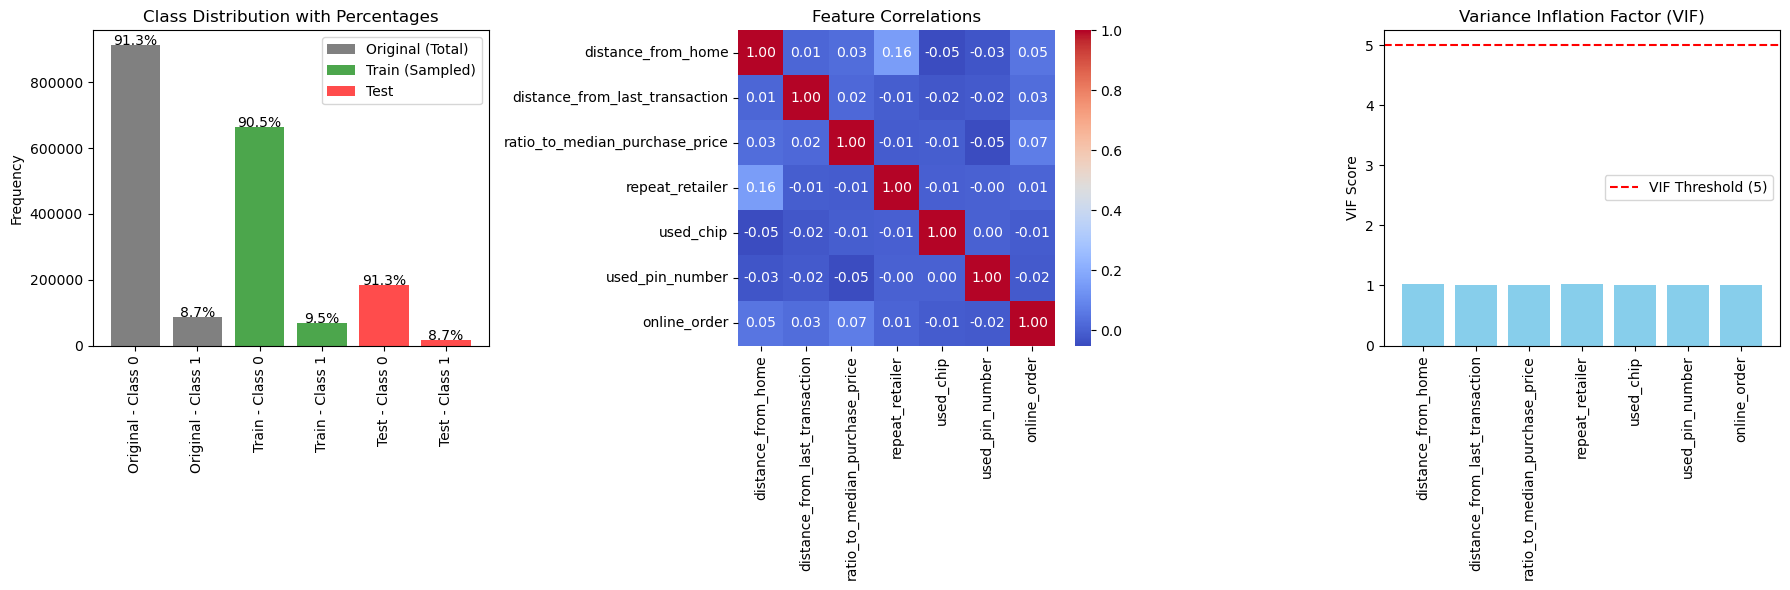

In [192]:
# Undersampling majority around decision boundary
X_train, X_test, y_train, y_test = sample_data(data, 'fraud', sampling_strategy='ENN')

**Note on increasing correlations:**
As expected, re-sampling increases correlations sometimes x10 but the resulant relations are still within reasonable levels.

In [204]:
# Update the results dataframe with differnet experiements
results = test_models(data, 'fraud', sampling_strategy='NearMiss', experiments_results_df=results, show_plots=False)
results = test_models(data, 'fraud', sampling_strategy='ENN', experiments_results_df=results, show_plots=False)
results = test_models(data, 'fraud', sampling_strategy='SMOTE', experiments_results_df=results, show_plots=False)
results = test_models(data, 'fraud', sampling_strategy='SMOTEENN', experiments_results_df=results, show_plots=False)

In [205]:
results

,Sampling Strategy,Model,Accuracy,Precision,Recall,F1,AUC,PR AUC,True Positive,False Positive,True Negative,False Negative,Top 5 Features
0,default,Decision Tree,0.980330,0.873504,0.906184,0.889544,0.996193,0.967336,15841,2294,180225,1640,"[ratio_to_median_purchase_price, online_order, distance_from_home, used_pin_number, distance_from_last_transaction]"
1,default,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17481,0,182519,0,"[ratio_to_median_purchase_price, online_order, distance_from_home, used_pin_number, used_chip]"
2,NearMiss,Decision Tree,0.470525,0.138708,0.970883,0.242736,0.905913,0.829325,16972,105386,77133,509,"[online_order, ratio_to_median_purchase_price, used_pin_number, distance_from_home, used_chip]"
3,NearMiss,Random Forest,0.999935,0.999886,0.999371,0.999628,0.999848,0.999627,17470,2,182517,11,"[online_order, ratio_to_median_purchase_price, used_pin_number, used_chip, distance_from_home]"
4,ENN,Decision Tree,0.976215,0.799755,0.970997,0.877096,0.991747,0.915089,16974,4250,178269,507,"[ratio_to_median_purchase_price, distance_from_home, online_order, distance_from_last_transaction, used_pin_number]"
5,ENN,Random Forest,0.983080,0.837815,1.000000,0.911751,0.999881,0.998811,17481,3384,179135,0,"[ratio_to_median_purchase_price, distance_from_home, distance_from_last_transaction, online_order, used_pin_number]"
6,SMOTE,Decision Tree,0.975695,0.796022,0.970654,0.874707,0.995906,0.964332,16968,4348,178171,513,"[ratio_to_median_purchase_price, distance_from_home, distance_from_last_transaction, online_order, used_chip]"
7,SMOTE,Random Forest,0.999955,1.000000,0.999485,0.999743,1.000000,0.999998,17472,0,182519,9,"[ratio_to_median_purchase_price, distance_from_home, online_order, distance_from_last_transaction, used_pin_number]"
8,SMOTEENN,Decision Tree,0.975680,0.795910,0.970654,0.874639,0.995768,0.963220,16968,4351,178168,513,"[ratio_to_median_purchase_price, distance_from_home, distance_from_last_transaction, online_order, used_chip]"
9,SMOTEENN,Random Forest,0.999915,0.999028,1.000000,0.999514,1.000000,0.999999,17481,17,182502,0,"[ratio_to_median_purchase_price, distance_from_home, online_order, distance_from_last_transaction, used_pin_number]"


**Note:** comparing results of differnet sampling strategies for the original Decision Tree and optimized Random Forest shows that various sampling strategies make significant difference in terms of performance. Optimized Random Forest still performs best in terms of overall accuracy as well as recall of minority class. Noteworthy, optimization is time consuming and costly. 